In [1]:
import subprocess
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

def run_experiment(model_param_file, train_adj_feature_file, fractionlabelsattack):
    print(f"Running experiment")
    
    command = [
        "python", "main.py",    
        '--model_param_file', model_param_file,
        '--train_adj_feature_file', train_adj_feature_file,
        '--nlabel' , str(fractionlabelsattack)
    ]
    
    result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')
    
    output = result.stdout
    match = re.search(r"AUC:\s*([\d.]+).*AP:\s*([\d.]+)", output, re.DOTALL)
    if match:
        auc = float(match.group(1))
        ap = float(match.group(2))
    else:
        auc, ap = None, None

    return auc, ap


In [2]:
params = ['model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.0.npz', 'model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.1.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.2.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.3.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.4.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.5.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.6.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.7.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.8.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.9.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges1.0.npz', ]
results = []
for i in params:
    auc, ap = run_experiment(i, 'matricx.npz', 0.1)
    results.append([i, auc, ap])


Running experiment
Running experiment
Running experiment
Running experiment
Running experiment
Running experiment
Running experiment
Running experiment
Running experiment
Running experiment
Running experiment


In [9]:
print(results)

[['model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.0.npz', 0.820323, 0.826094], ['model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.1.npz', 0.834053, 0.838434], ['model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.2.npz', 0.832974, 0.845894], ['model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.3.npz', 0.821661, 0.828978], ['model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.4.npz', 0.829889, 0.837955], ['model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.5.npz', 0.816013, 0.834588], ['model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.6.npz', 0.806209, 0.805669], ['model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.7.npz', 0.82892, 0.830184], ['model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.8.npz', 0.817263, 0.829941], ['model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.9.npz', 0.817506, 0.827036], ['model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges1.0.npz', 0.815331,

Text(0.5, 1.0, 'Effect of rewiring edges on attack')

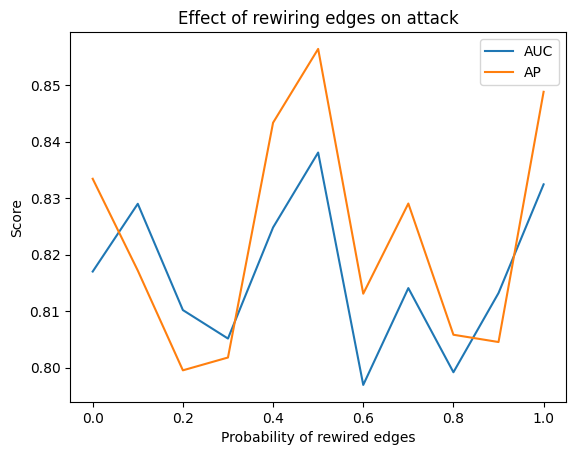

In [3]:
plt.plot([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], [r[1] for r in results], label='AUC')
plt.plot([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], [r[2] for r in results], label='AP')
plt.legend()
plt.xlabel('Probability of rewired edges')
plt.ylabel('Score')
plt.title('Effect of rewiring edges on attack')

In [11]:
params = ['model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.0.npz', 'model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.1.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.2.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.3.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.4.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.5.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.6.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.7.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.8.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.9.npz','model_cora_ml_dpsgd_False_sampling100.0_eps0pct_RewireEdges1.0.npz', ]
results = []
for i in params:
    auc, ap = run_experiment(i, 'matricx.npz', 0.5)
    results.append([i, auc, ap])


Running experiment
Running experiment
Running experiment
Running experiment
Running experiment
Running experiment
Running experiment
Running experiment
Running experiment
Running experiment
Running experiment


Text(0.5, 1.0, 'Effect of rewiring edges on attack')

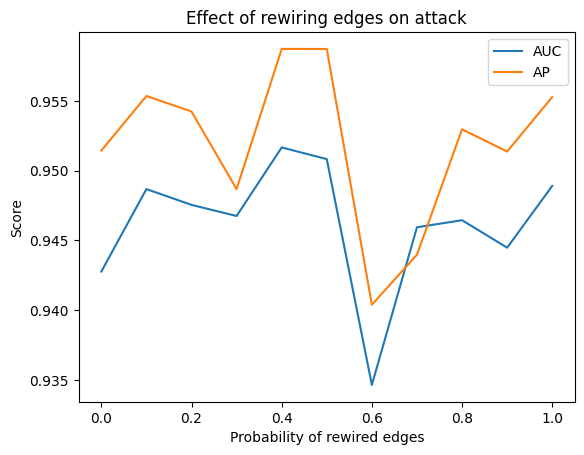

In [12]:
plt.plot([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], [r[1] for r in results], label='AUC')
plt.plot([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], [r[2] for r in results], label='AP')
plt.legend()
plt.xlabel('Probability of rewired edges')
plt.ylabel('Score')
plt.title('Effect of rewiring edges on attack')

In [ ]:
params = ['model_pubmed_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.0.npz', 'model_pubmed_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.1.npz','model_pubmed_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.2.npz','model_pubmed_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.3.npz','model_pubmed_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.4.npz','model_pubmed_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.5.npz','model_pubmed_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.6.npz','model_pubmed_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.7.npz','model_pubmed_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.8.npz','model_pubmed_dpsgd_False_sampling100.0_eps0pct_RewireEdges0.9.npz','model_pubmed_dpsgd_False_sampling100.0_eps0pct_RewireEdges1.0.npz', ]
results = []
for i in params:
    auc, ap = run_experiment(i, 'matricx_pubmed.npz', 0.1)
    results.append([i, auc, ap])


Running experiment


In [ ]:
plt.plot([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], [r[1] for r in results], label='AUC')
plt.plot([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], [r[2] for r in results], label='AP')
plt.legend()
plt.xlabel('Probability of rewired edges')
plt.ylabel('Score')
plt.title('Effect of rewiring edges on attack')